In [8]:
import numpy as np
import Example_matrices as ex
import dynamic_low_rank as dlr
import time_integration_low_rank as tilr
import Variable_step_size_integrator as vssi
import matplotlib.pyplot as plt

## Spørsmål

- Hvordan skal man kunne teste dlr?
    - hva slags A skal det fungere på
    - testing av Fu, gir matrise med elementer på størrelse $10^{-16}$  
    - (ekstra) hvordan ser man at B = CD.T
    - ks2 blir ikke brukt i time_integration_low_rank
    - hva slags A matise skal vi bruke i 3
    
<br>

- Variable solver er litt rar.
    - kan ikke konvergere da steglengden kun minkes.

### Oppgave 3 

In [9]:
def g(x,y):
    return np.sin(np.pi*x)*np.sin(2*np.pi*y)

def u_exact(x,y,t):
    return np.exp(-5*np.pi**2*t)*np.sin(np.pi*x)*np.sin(2*np.pi*y)

In [10]:
# test av oppgave 3

tol = 1.e-1
t0 = 0
tf = 0.02
h0 = 0.02 # initial step size in vssi
N = 5
k = 5 # k- rank approx

# def grid
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)

# def exact soln in t0
u_ex_0 = u_exact(X,Y,t0)
u_ex_f = u_exact(X,Y,tf)

#print(u_ex_0)

# Initialize u and u_dot
m,n = N,N
u0 = tilr.u_fun(g,m,n) 
u_dot = tilr.u_dot_fun(g,m,n)

# specify what method to use
method = tilr.second_order_method

# do method
Y,j = vssi.variable_solver(t0,tf,u0,tol,h0,method,k)

Yt = vssi.format_result(u_dot,Y)

In [11]:
x = np.linspace(0,1,10)
y = np.linspace(0,1,10)
X,Y = np.meshgrid(x,y)
t = 1

u = u_exact(X,Y,t)

print(np.linalg.norm(Yt[-1,:,:]-u))

269.33664248560217


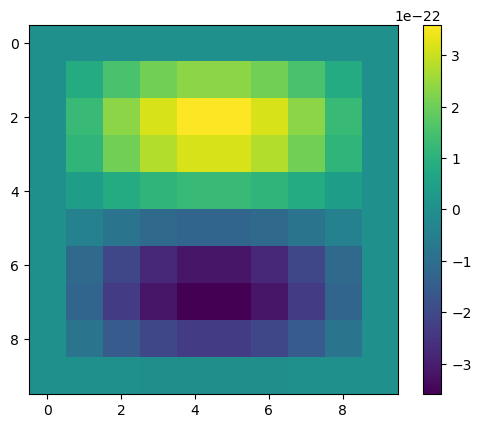

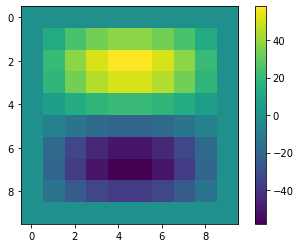

In [12]:
plt.imshow(u)
plt.colorbar()
plt.show()
plt.imshow(Yt[-1,:,:])
plt.colorbar()
plt.show()

In [5]:
# test av variable step for oppgave 4

t = 1.1
h = 1
tol = 10
k = 100
tf = 0.8

A = ex.A(0, epsilon = 1/2)
A_dot = ex.A_dot(0, epsilon = 1/2)
method = dlr.second_order_method

Y,j = vssi.variable_solver(0,tf,A,tol,h,method,k)
Yt = vssi.format_result(A_dot,Y)

print(np.linalg.norm(Yt[-1,:,:]-A,'fro'))

23.946002728920213
